In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
pwd

'/root/Documents/Projects/Classification of NSL KDD/Featre Engineering'

In [5]:
col_names = np.array(["protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","port"])

train = pd.read_csv('/root/Documents/dataset/NSL-KDD/KDDTrain+.txt', names=col_names)

In [6]:
train.shape

(125973, 42)

In [7]:
#train.isna().sum()

In [8]:
train.head()

protocol_type   service flag  src_bytes  dst_bytes  land  wrong_fragment  \
0           tcp  ftp_data   SF        491          0     0               0   
0           udp     other   SF        146          0     0               0   
0           tcp   private   S0          0          0     0               0   
0           tcp      http   SF        232       8153     0               0   
0           tcp      http   SF        199        420     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_same_srv_rate  \
0       0    0                  0  ...                    0.17   
0       0    0                  0  ...                    0.00   
0       0    0                  0  ...                    0.10   
0       0    0                  0  ...                    1.00   
0       0    0                  0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
0                    0.60                         0.88   
0                    0.05                         0.00   
0                    0.00                         0.03   
0                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
0                         0.00                  0.00   
0                         0.00                  1.00   
0                         0.04                  0.03   
0                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
0                      0.00                  0.00                      0.00   
0                      1.00                  0.00                      0.00   
0                      0.01                  0.00                      0.01   
0                      0.00                  0.00                      0.00   

    labels  port  
0   normal    20  
0   normal    15  
0  neptune    19  
0   normal    21  
0   normal    21  

[5 rows x 42 columns]

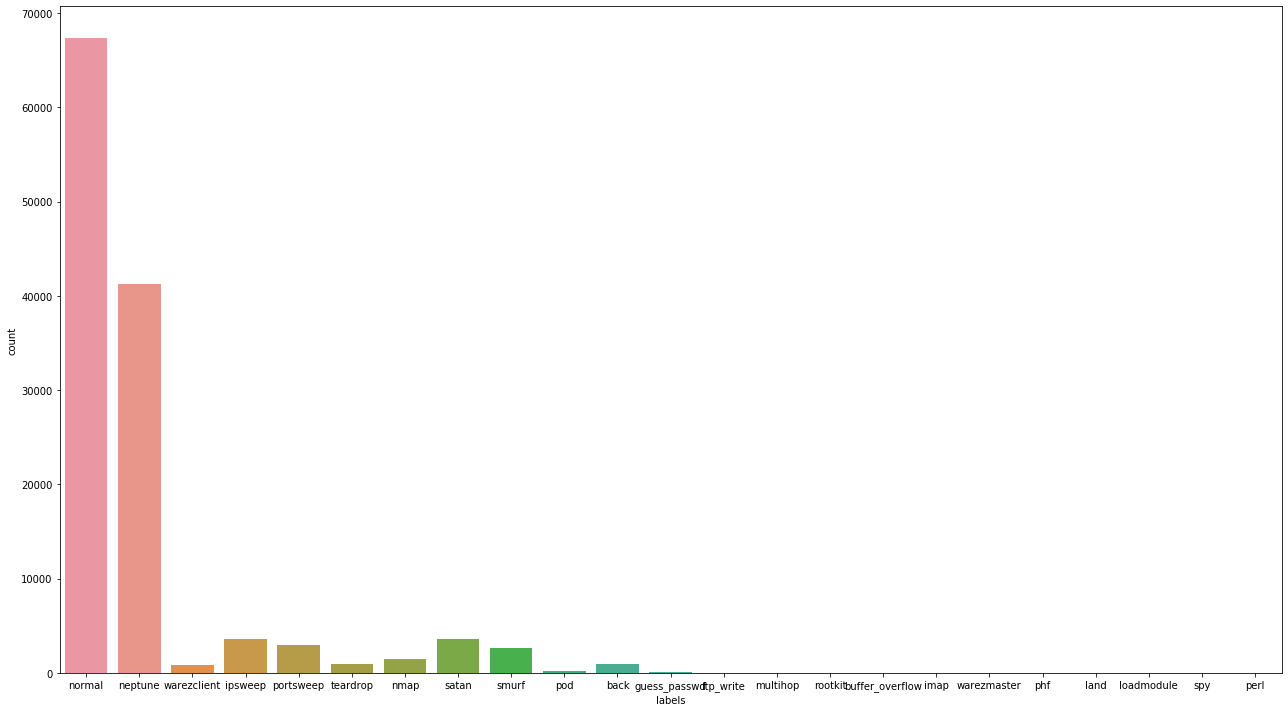

In [9]:
plt.figure(figsize=(18,10))
sns.countplot(train['labels'])
plt.tight_layout()

In [10]:
from sklearn.preprocessing import LabelEncoder

In [47]:
label_encoding = LabelEncoder()
train['labels'] = label_encoding.fit_transform(train['labels'])
train['protocol_type'] = label_encoding.fit_transform(train['protocol_type'])
train['service'] = label_encoding.fit_transform(train['service'])
train['flag'] = label_encoding.fit_transform(train['flag'])

In [57]:
print(train.corr())

                             src_bytes  dst_bytes  wrong_fragment       hot  \
src_bytes                     1.000000   0.000204       -0.000693  0.000295   
dst_bytes                     0.000204   1.000000       -0.000440 -0.000344   
wrong_fragment               -0.000693  -0.000440        1.000000 -0.008508   
hot                           0.000295  -0.000344       -0.008508  1.000000   
logged_in                    -0.003353  -0.002894       -0.072418  0.116435   
num_compromised              -0.000086   0.001233       -0.001044  0.002014   
num_root                     -0.000093   0.001229       -0.001108  0.001510   
num_file_creations           -0.000179   0.000089       -0.002343  0.028716   
count                        -0.005152  -0.003543       -0.020819 -0.068697   
srv_count                    -0.002792  -0.001754        0.024457 -0.034575   
rerror_rate                   0.013782   0.011176       -0.033052 -0.032382   
srv_rerror_rate               0.013975   0.011052   

In [67]:
train['logged_in'].value_counts()
#'wrong_fragment','logged_in','hot','num_file_creations'

0    76121
1    49852
Name: logged_in, dtype: int64

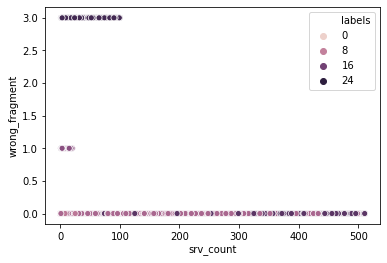

In [58]:
#negative correlation with labels
#'port','dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_srv_diff_host_rate','srv_diff_host_rate','srv_serror_rate','serror_rate'
sns.scatterplot('srv_count','wrong_fragment',data=train,hue='labels')

In [19]:
train.drop('num_outbound_cmds',axis=1,inplace=True)

In [48]:
train.describe().transpose()

count          mean           std  min    25%  \
protocol_type                125973.0      1.053202  4.266196e-01  0.0   1.00   
service                      125973.0     31.226469  1.634647e+01  0.0  20.00   
flag                         125973.0      6.979996  2.689365e+00  0.0   5.00   
src_bytes                    125973.0  45566.743000  5.870331e+06  0.0   0.00   
dst_bytes                    125973.0  19779.114421  4.021269e+06  0.0   0.00   
wrong_fragment               125973.0      0.022687  2.535300e-01  0.0   0.00   
hot                          125973.0      0.204409  2.149968e+00  0.0   0.00   
logged_in                    125973.0      0.395736  4.890101e-01  0.0   0.00   
num_compromised              125973.0      0.279250  2.394204e+01  0.0   0.00   
num_root                     125973.0      0.302192  2.439962e+01  0.0   0.00   
num_file_creations           125973.0      0.012669  4.839351e-01  0.0   0.00   
count                        125973.0     84.107555  1.145086e+02  0.0   2.00   
srv_count                    125973.0     27.737888  7.263584e+01  0.0   2.00   
rerror_rate                  125973.0      0.119958  3.204355e-01  0.0   0.00   
srv_rerror_rate              125973.0      0.121183  3.236472e-01  0.0   0.00   
same_srv_rate                125973.0      0.660928  4.396229e-01  0.0   0.09   
diff_srv_rate                125973.0      0.063053  1.803144e-01  0.0   0.00   
dst_host_count               125973.0    182.148945  9.920621e+01  0.0  82.00   
dst_host_srv_count           125973.0    115.653005  1.107027e+02  0.0  10.00   
dst_host_same_srv_rate       125973.0      0.521242  4.489494e-01  0.0   0.05   
dst_host_diff_srv_rate       125973.0      0.082951  1.889218e-01  0.0   0.00   
dst_host_same_src_port_rate  125973.0      0.148379  3.089971e-01  0.0   0.00   
dst_host_rerror_rate         125973.0      0.118832  3.065575e-01  0.0   0.00   
dst_host_srv_rerror_rate     125973.0      0.120240  3.194594e-01  0.0   0.00   
labels                       125973.0     10.625483  2.636084e+00  0.0   9.00   

                                50%     75%           max  
protocol_type                  1.00    1.00  2.000000e+00  
service                       24.00   49.00  6.900000e+01  
flag                           9.00    9.00  1.000000e+01  
src_bytes                     44.00  276.00  1.379964e+09  
dst_bytes                      0.00  516.00  1.309937e+09  
wrong_fragment                 0.00    0.00  3.000000e+00  
hot                            0.00    0.00  7.700000e+01  
logged_in                      0.00    1.00  1.000000e+00  
num_compromised                0.00    0.00  7.479000e+03  
num_root                       0.00    0.00  7.468000e+03  
num_file_creations             0.00    0.00  4.300000e+01  
count                         14.00  143.00  5.110000e+02  
srv_count                      8.00   18.00  5.110000e+02  
rerror_rate                    0.00    0.00  1.000000e+00  
srv_rerror_rate                0.00    0.00  1.000000e+00  
same_srv_rate                  1.00    1.00  1.000000e+00  
diff_srv_rate                  0.00    0.06  1.000000e+00  
dst_host_count               255.00  255.00  2.550000e+02  
dst_host_srv_count            63.00  255.00  2.550000e+02  
dst_host_same_srv_rate         0.51    1.00  1.000000e+00  
dst_host_diff_srv_rate         0.02    0.07  1.000000e+00  
dst_host_same_src_port_rate    0.00    0.06  1.000000e+00  
dst_host_rerror_rate           0.00    0.00  1.000000e+00  
dst_host_srv_rerror_rate       0.00    0.00  1.000000e+00  
labels                        11.00   11.00  2.200000e+01

In [22]:
train['is_host_login'].value_counts()

0    125972
1         1
Name: is_host_login, dtype: int64

In [24]:
#mean is very less
train.drop(['land','is_host_login','urgent','num_shells','num_failed_logins',
            'root_shell','su_attempted','num_access_files','is_guest_login'],
          axis=1,inplace=True)

In [38]:
#negative correlation with labels
train.drop(['port','dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_srv_diff_host_rate',
            'srv_diff_host_rate','srv_serror_rate','serror_rate'],
          axis=1,inplace=True)

In [56]:
#not much correlatetr
train.drop(['flag','protocol_type','service'],axis=1,inplace=True)

In [93]:
#Zero entry is much 
train.drop(['wrong_fragment','hot','logged_in','num_file_creations'],axis=1,inplace=True)

In [95]:
#remove Zero row
temp = (train != 0).any(axis=1)

In [96]:
new_train = train.loc[temp]

In [98]:
#new_train.nunique()
new_train.shape

(125973, 18)

In [100]:
new_train.head()

src_bytes  dst_bytes  num_compromised  num_root  count  srv_count  \
0        491          0                0         0      2          2   
0        146          0                0         0     13          1   
0          0          0                0         0    123          6   
0        232       8153                0         0      5          5   
0        199        420                0         0     30         32   

   rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  dst_host_count  \
0          0.0              0.0           1.00           0.00             150   
0          0.0              0.0           0.08           0.15             255   
0          0.0              0.0           0.05           0.07             255   
0          0.0              0.0           1.00           0.00              30   
0          0.0              0.0           1.00           0.00             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
0                   1                    0.00                    0.60   
0                  26                    0.10                    0.05   
0                 255                    1.00                    0.00   
0                 255                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_rerror_rate  \
0                         0.17                  0.05   
0                         0.88                  0.00   
0                         0.00                  0.00   
0                         0.03                  0.00   
0                         0.00                  0.00   

   dst_host_srv_rerror_rate  labels  
0                      0.00      11  
0                      0.00      11  
0                      0.00       9  
0                      0.01      11  
0                      0.00      11

/root/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/root/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


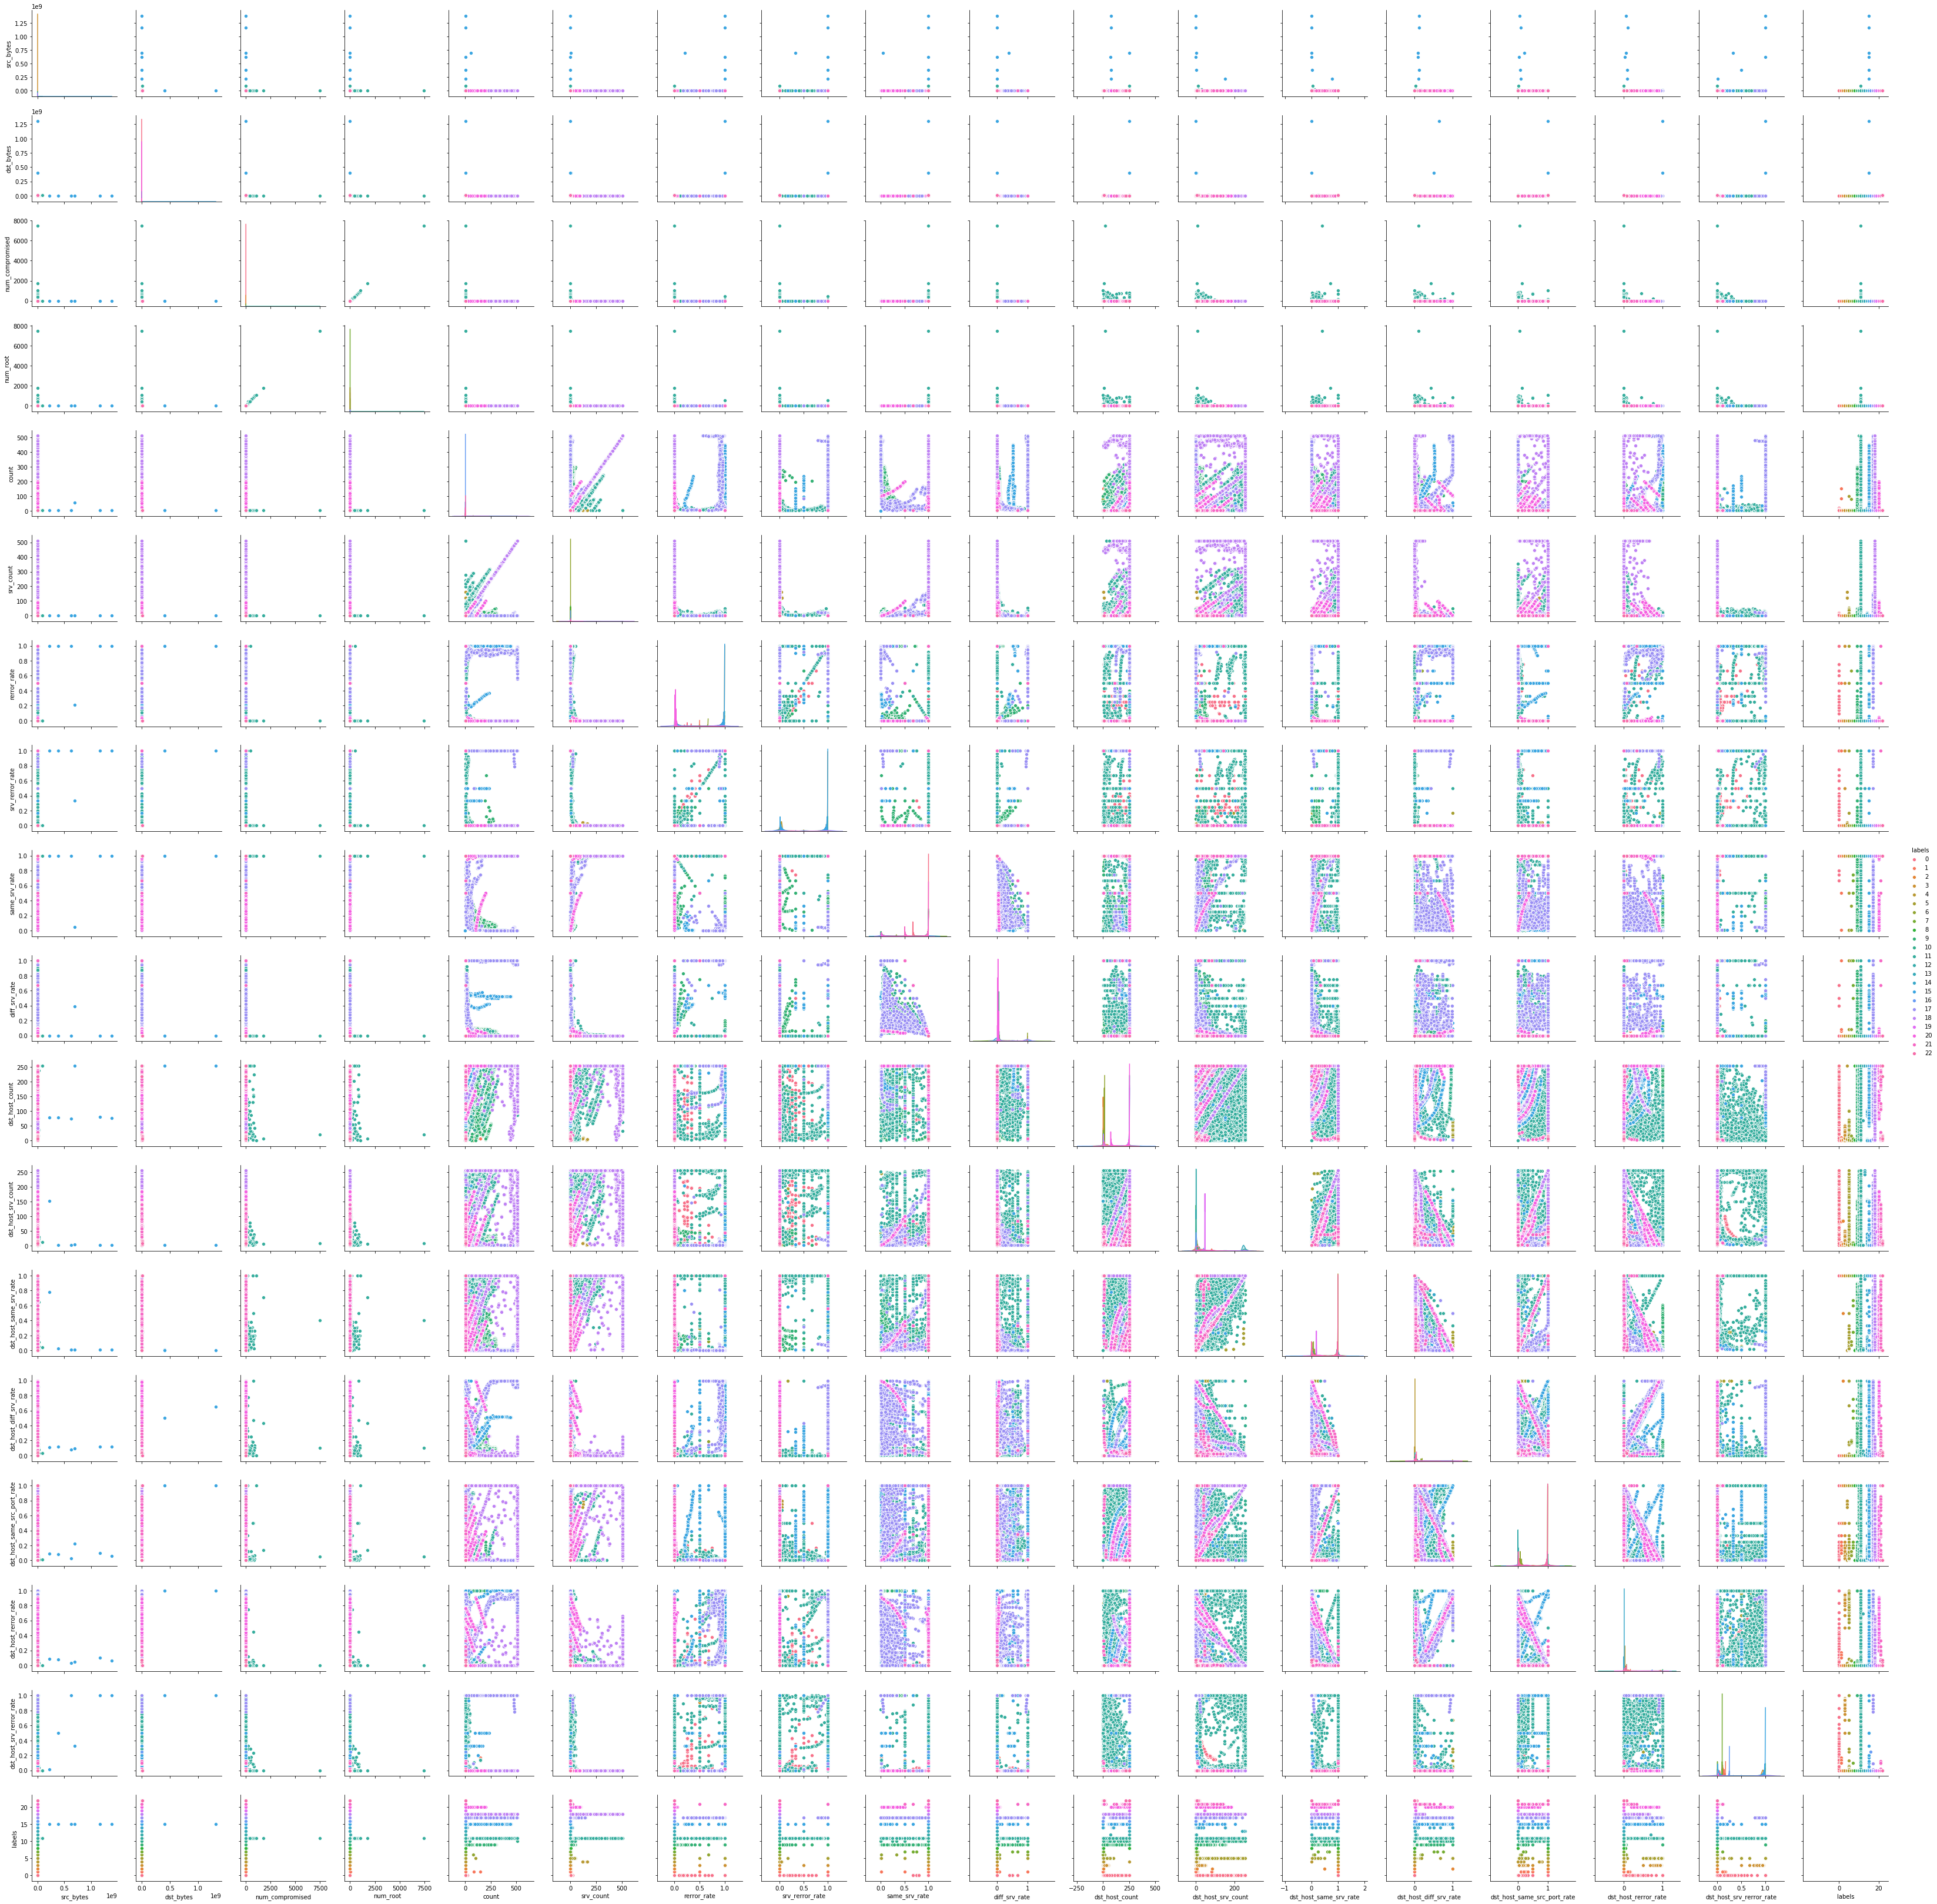

In [99]:
sns.pairplot(new_train,hue='labels')

In [104]:
#most Zero vales not correlate to any feature 
new_train.drop(['src_bytes','dst_bytes','num_compromised','num_root'],axis=1,inplace=True)

/root/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/root/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


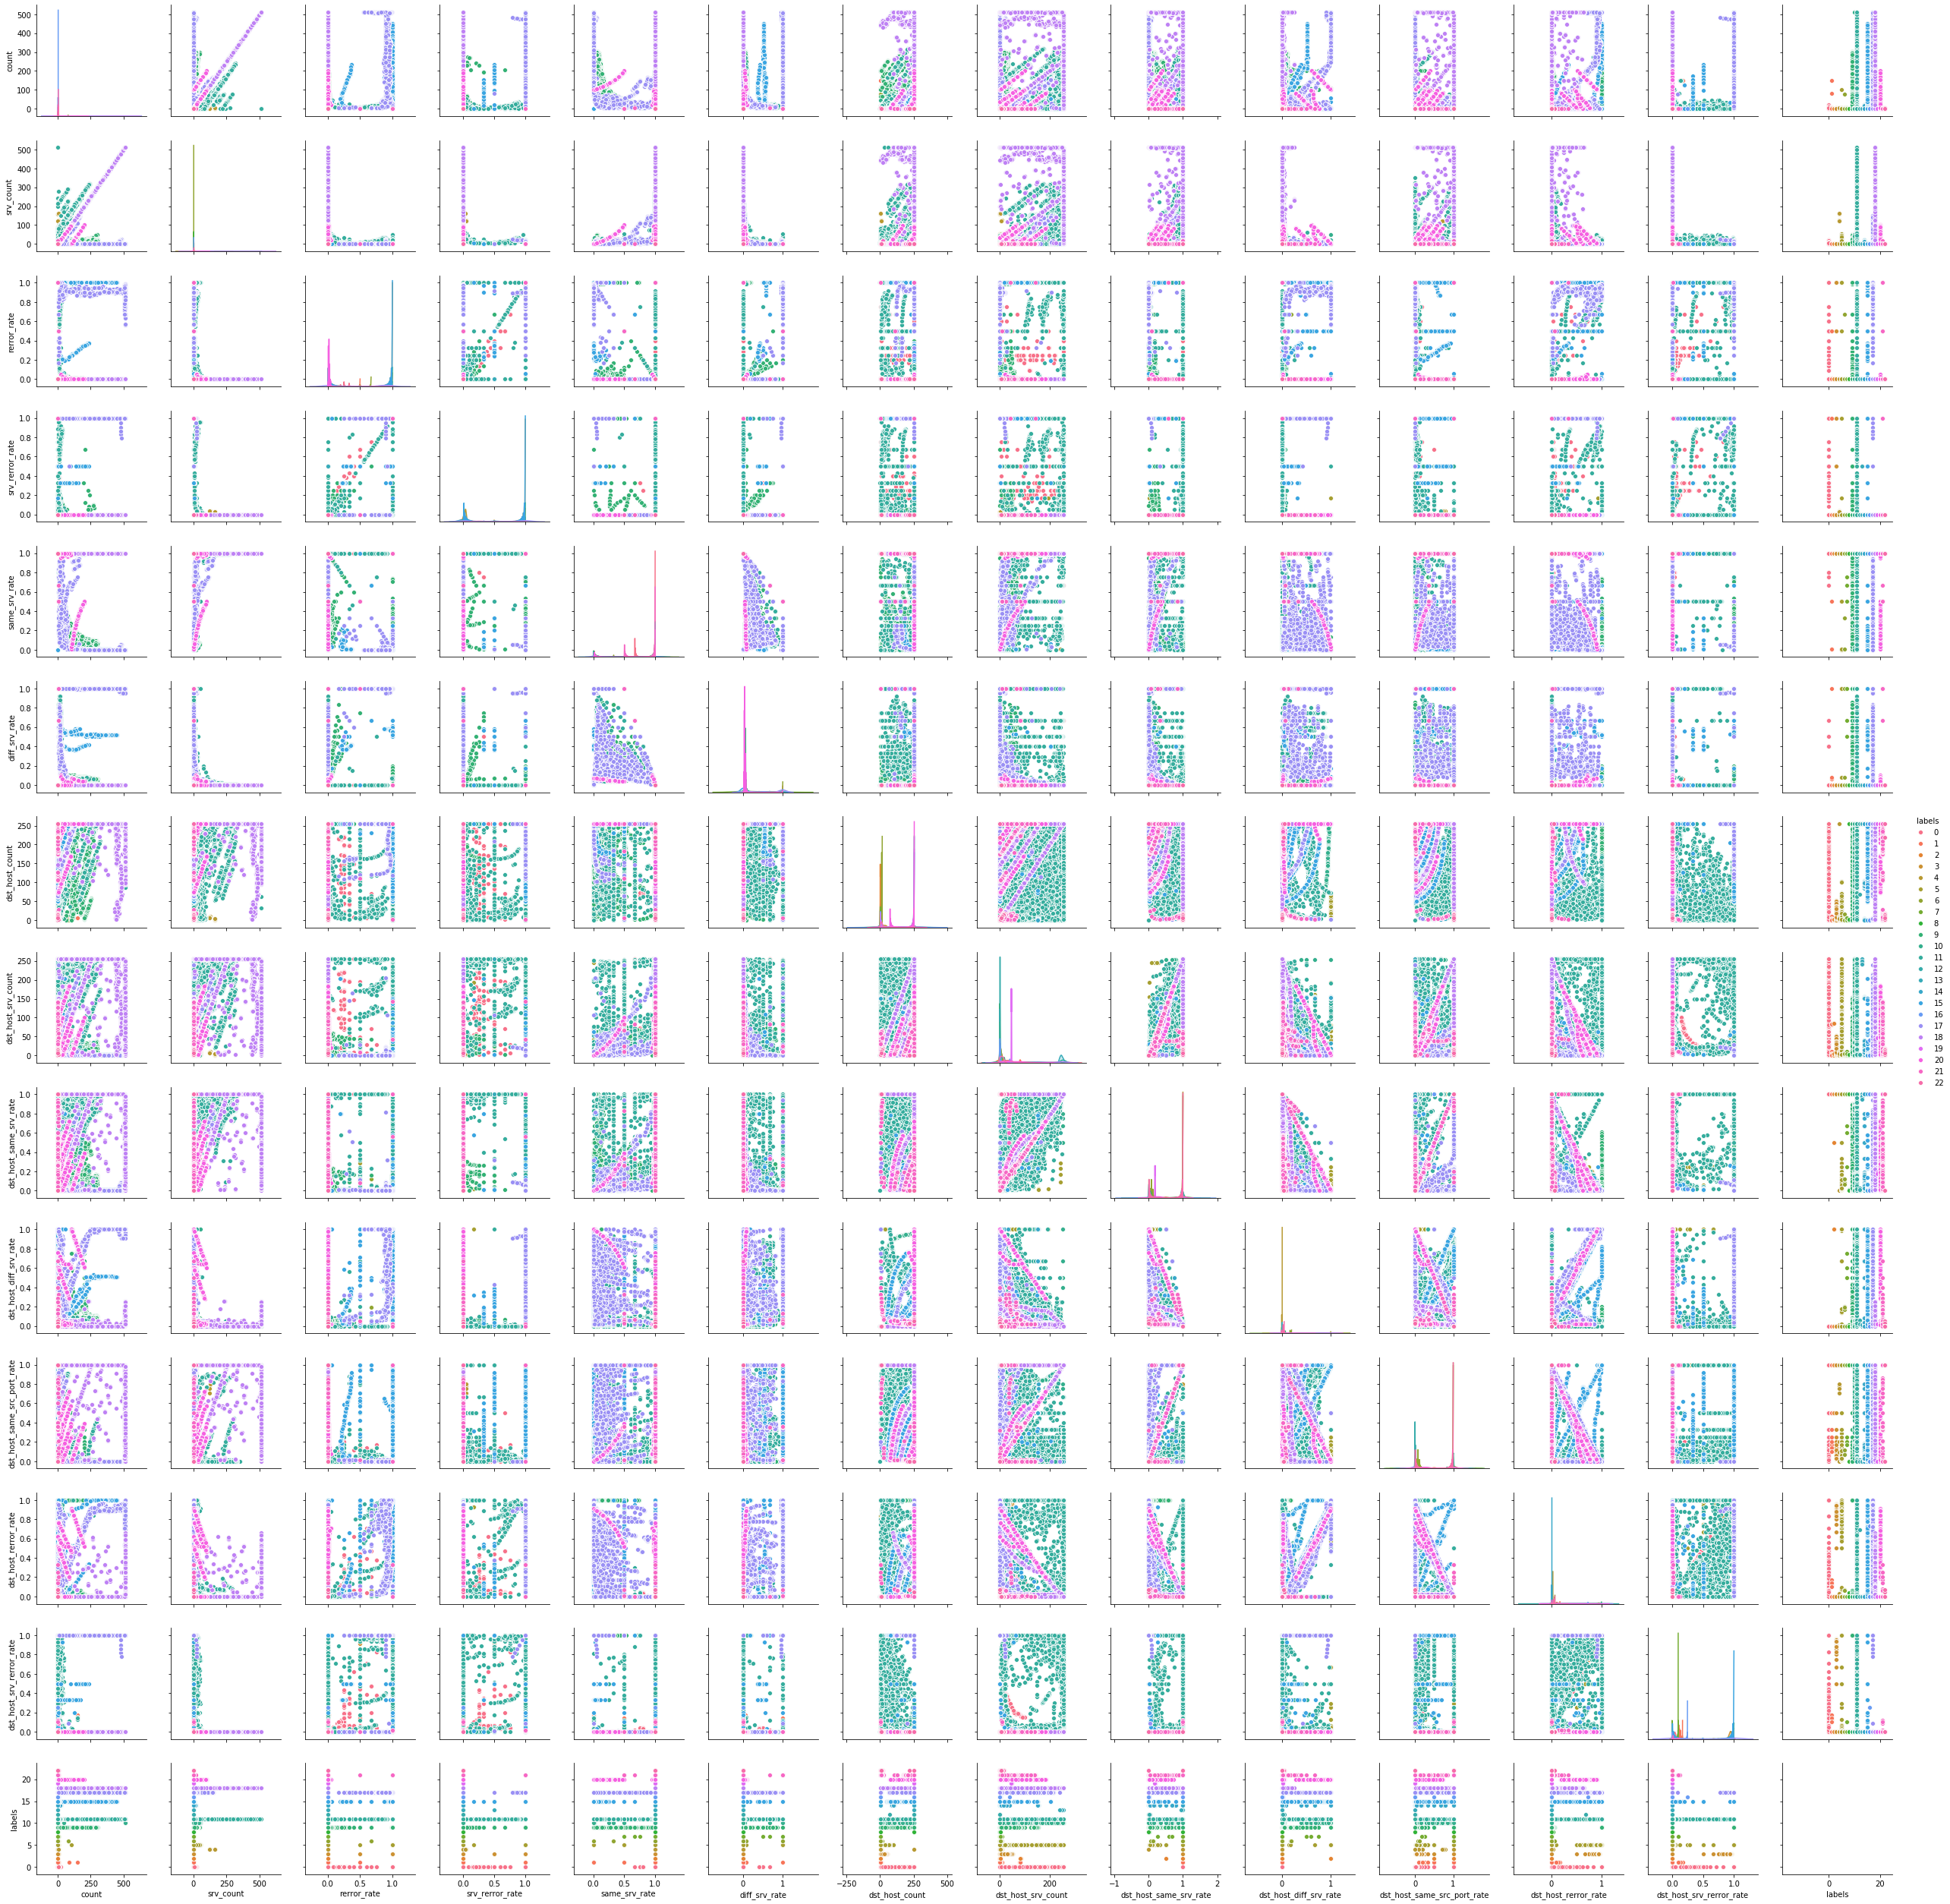

In [106]:
#again we plot pair plot
sns.pairplot(new_train,hue='labels')

In [107]:
new_train.to_csv('New_KDDTrain+.txt',index=False)